# **Evidencia 2. Análisis de Aprendizaje Automático**
# Equipo 1

(20 puntos) Documenta el análisis exploratorio de los datos e incluye, los objetivos de la modelación y evaluación de los datos.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Cargar los datos
data_path = '/content/Credit_Score.csv'
data = pd.read_csv(data_path)

# Ver las primeras filas del conjunto de datos
print(data.head())

   age  annual_income  monthly_inhand_salary  num_bank_accounts  \
0   23       19114.12              1824.8433                  3   
1   23       19114.12              1824.8433                  3   
2   23       19114.12              1824.8433                  3   
3   23       19114.12              1824.8433                  3   
4   23       19114.12              1824.8433                  3   

   num_credit_card  interest_rate  num_of_loan  delay_from_due_date  \
0                4              3            4                    3   
1                4              3            4                    3   
2                4              3            4                    3   
3                4              3            4                    3   
4                4              3            4                    3   

   num_of_delayed_payment  changed_credit_limit  ...  has_personal_loan  \
0                       4                 11.27  ...                  1   
1                   

In [3]:
# Verificar los tipos de datos de las columnas
print(data.dtypes)

age                                   int64
annual_income                       float64
monthly_inhand_salary               float64
num_bank_accounts                     int64
num_credit_card                       int64
interest_rate                         int64
num_of_loan                           int64
delay_from_due_date                   int64
num_of_delayed_payment                int64
changed_credit_limit                float64
num_credit_inquiries                  int64
outstanding_debt                    float64
credit_utilization_ratio            float64
credit_history_age                    int64
total_emi_per_month                 float64
amount_invested_monthly             float64
monthly_balance                     float64
credit_mix_good                       int64
credit_mix_standard                   int64
month_august                          int64
month_february                        int64
month_january                         int64
month_july                      

In [4]:
# Resumen estadístico de los datos numéricos
print(data.describe())

                 age  annual_income  monthly_inhand_salary  num_bank_accounts  \
count  100000.000000  100000.000000          100000.000000      100000.000000   
mean       33.274560   50505.123449            4197.534569           5.631200   
std        10.764438   38299.422093            3187.289267           2.325141   
min        14.000000    7005.930000             303.645400           1.000000   
25%        24.000000   19342.972500            1626.719825           4.000000   
50%        33.000000   36999.705000            3092.270000           6.000000   
75%        42.000000   71683.470000            5958.695625           7.000000   
max        56.000000  179987.280000           15204.633300          10.000000   

       num_credit_card  interest_rate    num_of_loan  delay_from_due_date  \
count    100000.000000   100000.00000  100000.000000        100000.000000   
mean          5.532800       14.53208       3.989200            21.054240   
std           2.067657        8.74133  

In [5]:
# Revisar la información faltante
print(data.isnull().sum())

age                                 0
annual_income                       0
monthly_inhand_salary               0
num_bank_accounts                   0
num_credit_card                     0
interest_rate                       0
num_of_loan                         0
delay_from_due_date                 0
num_of_delayed_payment              0
changed_credit_limit                0
num_credit_inquiries                0
outstanding_debt                    0
credit_utilization_ratio            0
credit_history_age                  0
total_emi_per_month                 0
amount_invested_monthly             0
monthly_balance                     0
credit_mix_good                     0
credit_mix_standard                 0
month_august                        0
month_february                      0
month_january                       0
month_july                          0
month_june                          0
month_march                         0
month_may                           0
occupation_a

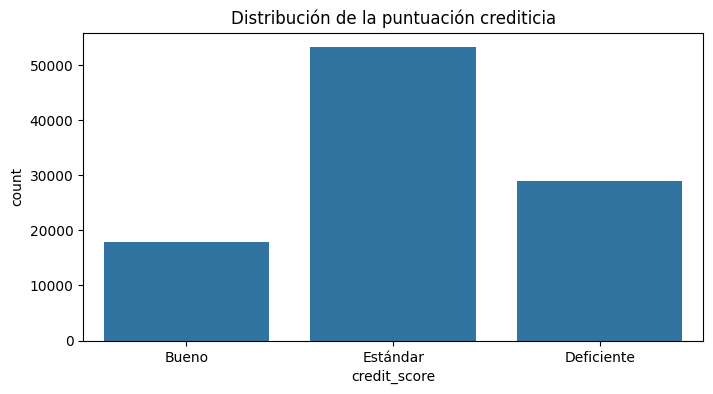

In [6]:
# Mapear los valores numéricos a etiquetas descriptivas
score_mapping = {0: 'Deficiente', 1: 'Bueno', 2: 'Estándar'}
data['credit_score'] = data['credit_score'].map(score_mapping)

#Distribución de la variable objetivo 'credit_score'
plt.figure(figsize=(8, 4))
sns.countplot(x='credit_score', data=data)
plt.title('Distribución de la puntuación crediticia')
plt.show()

El archivo muestra una serie de datos que reflejan diferentes aspectos del perfil financiero de los clientes, incluyendo su comportamiento de pago y características económicas. El objetivo de este análisis es entender la estructura del conjunto de datos para poder desarrollar un modelo de clasificación eficiente.


## Objetivos de la Modelación y Evaluación

Objetivo de la Modelación:
Buscamos desarrollar un sistema que clasifique automáticamente las puntuaciones crediticias de los clientes en tres categorías: "Deficiente", "Bueno" y "Estándar". Esto permitirá una asignación de recursos más eficiente y una mejor gestión del riesgo crediticio.

Evaluación del Modelo:
El modelo será evaluado utilizando métricas estándar en clasificación, incluyendo:

* Matriz de Confusión: Para visualizar el rendimiento del modelo en cada clase.
* Exactitud (Accuracy): Proporción de predicciones correctas.
* Precisión, Recall y F1-Score: Estas métricas ayudarán a balancear la precisión y la sensibilidad del modelo.

# Implementación de PCA

**Separación de datos**

In [7]:
data=data.dropna()

In [8]:
data.head()

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,...,has_personal_loan,has_student_loan,has_auto_loan,has_credit-builder_loan,has_debt_consolidation_loan,has_payday_loan,has_not_specified,has_home_equity_loan,has_mortgage_loan,credit_score
0,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,1,0,1,1,0,0,0,1,0,Bueno
1,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,1,0,1,1,0,0,0,1,0,Bueno
2,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,1,0,1,1,0,0,0,1,0,Bueno
3,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,1,0,1,1,0,0,0,1,0,Bueno
4,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,1,0,1,1,0,0,0,1,0,Bueno


In [9]:
y = data['credit_score'] # clases
x=data.drop('credit_score',axis=1)
print(y.shape)
print(x.shape)

(100000,)
(100000, 55)


In [10]:
y

0             Bueno
1             Bueno
2             Bueno
3             Bueno
4             Bueno
            ...    
99995    Deficiente
99996    Deficiente
99997    Deficiente
99998      Estándar
99999    Deficiente
Name: credit_score, Length: 100000, dtype: object

In [11]:
x

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,...,payment_of_min_amount_yes,has_personal_loan,has_student_loan,has_auto_loan,has_credit-builder_loan,has_debt_consolidation_loan,has_payday_loan,has_not_specified,has_home_equity_loan,has_mortgage_loan
0,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,0,1,0,1,1,0,0,0,1,0
1,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,0,1,0,1,1,0,0,0,1,0
2,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,0,1,0,1,1,0,0,0,1,0
3,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,0,1,0,1,1,0,0,0,1,0
4,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,0,1,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,39628.99,3359.4158,4,6,7,2,23,6,11.50,...,0,0,1,1,0,0,0,0,0,0
99996,25,39628.99,3359.4158,4,6,7,2,23,6,11.50,...,0,0,1,1,0,0,0,0,0,0
99997,25,39628.99,3359.4158,4,6,7,2,23,6,11.50,...,0,0,1,1,0,0,0,0,0,0
99998,25,39628.99,3359.4158,4,6,7,2,23,6,11.50,...,0,0,1,1,0,0,0,0,0,0


**Escalamiento de datos**

In [12]:
from sklearn.preprocessing import StandardScaler
# distribucion resultante queda con varianza igual a la unidad
sc = StandardScaler()
X_sc = sc.fit_transform(x)

**Visualización de variación explicada**

In [13]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_sc)
print(X_pca.shape)

(100000, 55)


In [14]:
pca.explained_variance_ratio_

array([1.49372401e-01, 5.33009602e-02, 3.42346223e-02, 2.30604790e-02,
       2.20940019e-02, 2.07843913e-02, 2.07797164e-02, 2.07792208e-02,
       2.07792208e-02, 2.07792208e-02, 2.07773233e-02, 2.07425436e-02,
       2.02336229e-02, 2.00475791e-02, 1.97871955e-02, 1.96665569e-02,
       1.96166314e-02, 1.95769238e-02, 1.95485472e-02, 1.95088516e-02,
       1.94911716e-02, 1.94851695e-02, 1.94628020e-02, 1.93977296e-02,
       1.92739246e-02, 1.90637301e-02, 1.88441003e-02, 1.80016231e-02,
       1.74097746e-02, 1.71825812e-02, 1.70170823e-02, 1.69077024e-02,
       1.66975226e-02, 1.64275502e-02, 1.63480059e-02, 1.60422901e-02,
       1.58806573e-02, 1.45938669e-02, 1.42992375e-02, 1.06355408e-02,
       9.80447813e-03, 8.74733264e-03, 8.32218539e-03, 7.62567756e-03,
       7.04553745e-03, 6.63101267e-03, 5.29921487e-03, 4.63029625e-03,
       4.07749221e-03, 3.68978110e-03, 2.59731512e-03, 1.31098519e-03,
       1.14736887e-03, 1.11031618e-03, 2.89334871e-05])

In [15]:
np.cumsum(pca.explained_variance_ratio_)

array([0.1493724 , 0.20267336, 0.23690798, 0.25996846, 0.28206246,
       0.30284686, 0.32362657, 0.34440579, 0.36518501, 0.38596423,
       0.40674156, 0.4274841 , 0.44771772, 0.4677653 , 0.4875525 ,
       0.50721906, 0.52683569, 0.54641261, 0.56596116, 0.58547001,
       0.60496118, 0.62444635, 0.64390915, 0.66330688, 0.68258081,
       0.70164454, 0.72048864, 0.73849026, 0.75590004, 0.77308262,
       0.7900997 , 0.8070074 , 0.82370492, 0.84013247, 0.85648048,
       0.87252277, 0.88840343, 0.90299729, 0.91729653, 0.92793207,
       0.93773655, 0.94648388, 0.95480607, 0.96243175, 0.96947728,
       0.9761083 , 0.98140751, 0.98603781, 0.9901153 , 0.99380508,
       0.9964024 , 0.99771338, 0.99886075, 0.99997107, 1.        ])

**Reducción de variables**

In [16]:
from sklearn.model_selection import train_test_split
pca = PCA(n_components=0.9)
X_pca=pca.fit_transform(X_sc)
X_pca.shape


(100000, 38)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, stratify=y,random_state=42)
X_train.shape

(80000, 38)

# Modelos supervisados

**Método del centroide**

In [18]:
from sklearn.neighbors import NearestCentroid
md = NearestCentroid() # 1 Creamos el modelo por default

#  2 Entrenamos
md.fit(X_train, y_train)

y_pred = md.predict(X_test) # 3 Predicciones
print("Test set predictions using Min. Dist: ",format(y_pred))

Test set predictions using Min. Dist:  ['Deficiente' 'Deficiente' 'Deficiente' ... 'Estándar' 'Bueno'
 'Deficiente']


In [19]:
from sklearn.metrics import accuracy_score # print the accuracy of the trained model

accuracy_score(y_test, y_pred)

0.63435

**Método del clasificador**

In [20]:
from sklearn.neighbors import KNeighborsClassifier # Clasificador Scikit Learn
knn = KNeighborsClassifier(n_neighbors=3) # Hiperparametro k = 3

# 2 Entrenamiento
knn.fit(X_train, y_train)
# 3 Generar predicciones
y_pred = knn.predict(X_test)

print("Test set predictions using KNN: ",format(y_pred))

Test set predictions using KNN:  ['Estándar' 'Deficiente' 'Deficiente' ... 'Estándar' 'Bueno' 'Deficiente']


In [21]:
accuracy_score(y_test, y_pred)

0.6708

**Método del arbol**

In [22]:
from sklearn.tree import DecisionTreeClassifier # Importamos
dt = DecisionTreeClassifier() # 1.- Creamos el modelo, sin restricciones en el árbol

dt.fit(X_train, y_train) # 2.- Entrenamos

# 3.- Predicciones
y_test_pred = dt.predict(X_test)
y_train_pred = dt.predict(X_train)

test_acc = accuracy_score(y_test_pred, y_test)
train_acc = accuracy_score(y_train_pred, y_train)
print('% de aciertos sobre el set de prueba: ', test_acc)
print('% de aciertos sobre el set de entrenamiento: ', train_acc)

% de aciertos sobre el set de prueba:  0.6905
% de aciertos sobre el set de entrenamiento:  1.0


In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC # Support Vector Classifier

std_scl = StandardScaler()
svc = SVC(kernel='linear', C=100) # tipo de kernel, C: [Soft...C...Hard]

svc_clf = make_pipeline(std_scl, svc) # defino la secuencia de izq a der

In [ ]:
#from sklearn.metrics import accuracy_score

#svc_clf.fit(X_train, y_train) # Entrenamos

# Predicciones
#y_test_pred = svc_clf.predict(X_test)
#y_train_pred = svc_clf.predict(X_train)

#test_acc = accuracy_score(y_test_pred, y_test)
#train_acc = accuracy_score(y_train_pred, y_train)
#print('% de aciertos sobre el set de PRUEBA: ', round(test_acc*100, 3))
#print('% de aciertos sobre el set de ENTRENAMIENTO: ', round(train_acc*100, 3))

# Modelos no supervisados